In [1]:
import pandas as pd
import numpy as np
test_data=pd.read_csv('/Users/gauravtyagi/Downloads/data/Test_data_mart.csv')
train_data=pd.read_csv('/Users/gauravtyagi/Downloads/data/Train_data_mart.csv')
sample_date=pd.read_csv('/Users/gauravtyagi/Downloads/data/SampleSubmission_datamart.csv')

In [2]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [369]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [370]:
#Item_Fat_Content,Item_Weight,Item_Visibility,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
#Replace Nan value for Outlet_Size to medium
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [371]:
#Replace Nan value for Item_Weight to median
Item_Weight=(train_data['Item_Weight'].sum())/(train_data['Item_Weight'].count())
train_data['Item_Weight']=train_data['Item_Weight'].fillna(Item_Weight)
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [372]:
from sklearn.model_selection import train_test_split
train_data1=train_data

In [373]:

#train_data1= pd.get_dummies(train_data1,columns=["Item_Fat_Content"],drop_first=False)

In [374]:
#train_data1= pd.get_dummies(train_data1,columns=["Item_Type"],drop_first=False)

In [375]:
train_data1= pd.get_dummies(train_data1,columns=["Outlet_Size"],drop_first=False)

In [376]:
train_data1= pd.get_dummies(train_data1,columns=["Outlet_Location_Type"],drop_first=False)

In [377]:
train_data1= pd.get_dummies(train_data1,columns=["Outlet_Type"],drop_first=False)
#train_data1= pd.get_dummies(train_data1,columns=["Item_Identifier"],drop_first=False)
train_data1=train_data1.drop(['Outlet_Identifier','Outlet_Establishment_Year','Item_Fat_Content','Item_Identifier',
                              'Item_Type',
                              ],axis=1)

In [378]:
train_data1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.016047,249.8092,3735.1380,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,48.2692,443.4228,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,141.6180,2097.2700,0,1,0,1,0,0,0,1,0,0
3,19.200000,0.000000,182.0950,732.3800,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,53.8614,994.7052,1,0,0,0,0,1,0,1,0,0
5,10.395000,0.000000,51.4008,556.6088,0,1,0,0,0,1,0,0,1,0
6,13.650000,0.012741,57.6588,343.5528,1,0,0,0,0,1,0,1,0,0
7,12.857645,0.127470,107.7622,4022.7636,0,1,0,0,0,1,0,0,0,1
8,16.200000,0.016687,96.9726,1076.5986,0,1,0,0,1,0,0,1,0,0
9,19.200000,0.094450,187.8214,4710.5350,0,1,0,0,1,0,0,1,0,0


In [379]:
# create training and testing vars
y=train_data1['Item_MRP']

In [380]:
train_data=train_data.drop('Item_MRP',axis=1)

In [381]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [382]:
X_train, X_test, y_train, y_test = train_test_split(train_data1, y, test_size=0.3)

In [383]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [384]:
y_pred=lr.predict(X_test)

In [385]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [386]:
import matplotlib.pyplot as plt

In [392]:
train_data1.info()

(5966,)

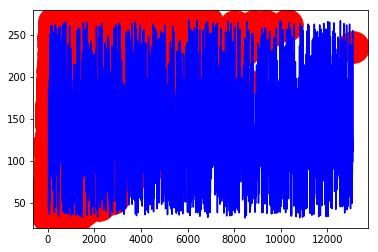

In [396]:
plt.scatter(X_test['Item_Outlet_Sales'],y_test,color='red',s=1000)
plotline=np.linspace(X_test['Item_Outlet_Sales'].min(),X_test['Item_Outlet_Sales'].max(),2557)
plt.plot(plotline,y_pred,color='blue')
plt.show()


In [357]:
from sklearn.linear_model import Ridge,Lasso

In [358]:
rd=Ridge()
las=Lasso()

In [359]:
rd.fit(X_train,y_train)
las.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [360]:
y_pred_rd=rd.predict(X_test)
y_pred_las=las.predict(X_test)

In [361]:
print("Linear Regression Mean squared error    "+str(mean_squared_error(y_pred,y_test)))
print("Ridge Regression Mean squared error    "+str(mean_squared_error(y_pred_rd,y_test)))
print("Lasso Regression Mean squared error    "+str(mean_squared_error(y_pred_las,y_test)))

Linear Regression Mean squared error    4.8939165880843185e-27
Ridge Regression Mean squared error    1.2483568886115806e-11
Lasso Regression Mean squared error    0.0003534596198998555


In [362]:
print("Linear Regression Mean absolute error    "+str(mean_absolute_error(y_pred,y_test)))
print("Ridge Regression Mean absolute error    "+str(mean_absolute_error(y_pred_rd,y_test)))
print("Lasso Regression Mean absolute error    "+str(mean_absolute_error(y_pred_las,y_test)))

Linear Regression Mean absolute error    5.624736326119698e-14
Ridge Regression Mean absolute error    2.8374696478054848e-06
Lasso Regression Mean absolute error    0.015380714169145583


In [3]:
plt.scatter(X_test['Item_Outlet_Sales'],y_test,color='red',s=1000)
plotline=np.linspace(X_test['Item_Outlet_Sales'].min(),X_test['Item_Outlet_Sales'].max(),2557)
plt.plot(plotline,y_pred_rd,color='blue')
plt.show()

NameError: name 'plt' is not defined

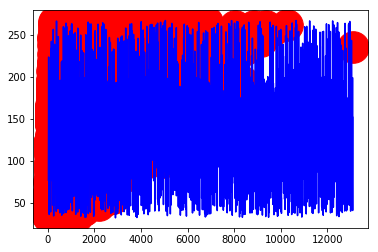

In [398]:
plt.scatter(X_test['Item_Outlet_Sales'],y_test,color='red',s=1000)
plotline=np.linspace(X_test['Item_Outlet_Sales'].min(),X_test['Item_Outlet_Sales'].max(),2557)
plt.plot(plotline,y_pred_las,color='blue')
plt.show()